In [76]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df_origin = pd.read_csv('data_clean.csv')
df_clean = pd.read_csv('data_clean.csv')

In [47]:
df_origin.describe()

,Series 1
count,1944.000000
mean,205.849216
std,4386.574544
min,-108408.915681
25%,-729.725892
50%,423.211007
75%,908.240114
max,86990.306319


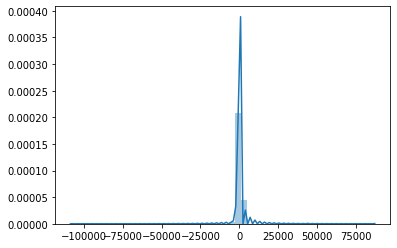

In [65]:
sns.distplot(df_origin.fillna(df.mean()))

In [64]:
df_origin

,Series 1
0,2397.167568
1,2371.333300
2,2573.025408
3,NaN
4,2574.872476
...,...
2512,NaN
2513,-999.167188
2514,-1018.355861
2515,-1013.176196


In [50]:
df_origin.isna().sum()

Series 1    573
dtype: int64

## clean

In [60]:
upper_bound = df_origin.quantile(0.95)
lower_bound = df_origin.quantile(0.05)

df_clean = df_origin[(lower_bound < df_origin) & (df_origin < upper_bound)]

In [70]:
df_clean.fillna(df_clean.mean(), inplace=True)

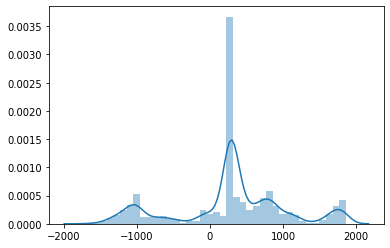

In [74]:
sns.distplot(df_clean)

In [182]:
# df_clean.to_csv('GruzenMachen_data_cleaning.csv', index=False)

In [73]:
df_clean

,Series 1
0,285.245808
1,285.245808
2,285.245808
3,285.245808
4,285.245808
...,...
2512,285.245808
2513,-999.167188
2514,-1018.355861
2515,-1013.176196


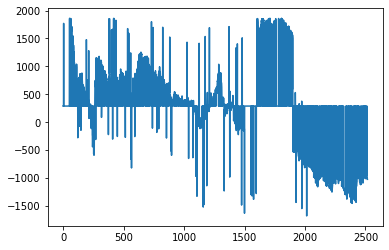

In [151]:
plt.plot(df_clean)

## Clean 2

In [178]:
df_clean2 = df_origin.copy()

upper_bound = df_origin.quantile(0.99)
lower_bound = df_origin.quantile(0.01)

df_clean2 = df_origin[(lower_bound < df_origin) & (df_origin < upper_bound)]

df_clean2.interpolate(method='polynomial', order=2, inplace=True)

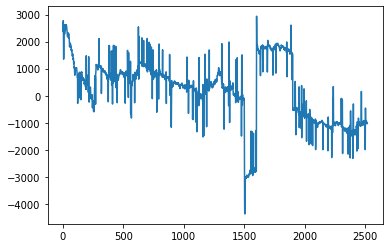

In [179]:
plt.plot(df_clean2)

In [181]:
# df_clean2.to_csv('GruzenMachen_data_cleaning1.csv', index=False)

In [ ]:
# window_size = 30
# [range(i*window_size, (i + 1)*window_size) for i in range(25)]
# std_factor = 10

# for window in range(window, len(df_clean)):
#     df_local = df_clean2.iloc[i - window: i]
#     median = df_local.quantile(0.5)
#     std = df_local.std()[0]
#     low = median - std_factor*std
#     high = median + std_factor*std
#     df_local = df_local[(low < df_local) & (df_local < high)]
#     df_local.fillna(df_local.median(), inplace=True)      
#     df_clean2.iloc[i - window: i] = df_local


## Visuals

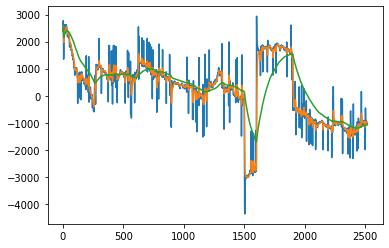

In [206]:
fast = 10
slow = 200

slow_MA = df_clean2.ewm(span=slow).mean()
fast_MA = df_clean2.ewm(span=fast).mean()

plt.plot(df_clean2)
plt.plot(fast_MA)
plt.plot(slow_MA)

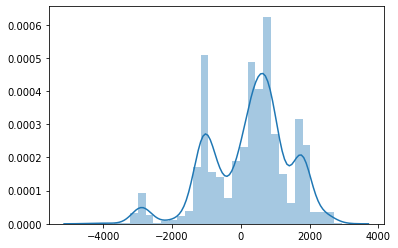

In [186]:
sns.distplot(df_clean2)

In [207]:
import plotly.express as px

fig = px.line(df_clean2)
fig2 = px.line(fast_MA)
fig2.show()
fig.show()

In [236]:
# fast_MA.to_csv('GruzenMachen_data_cleaning1.csv')